# Лабораторная работа №1


## Описание датасета
Этот набор данных состоит из оценок, полученных учащимися по различным предметам. Оценки, полученные учащимися в старшей школе.
Учащиеся из Соединенных Штатов. Датасет: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

## Атрибуты 
- gender: string(male, female)
- race/ethnicity: string(group A-E)
- parental level of education: string(some college, associate's degree, high school, some high school, bachelor's degree)
- lunch: string(standard, free/reduced)
- test preparation course: string(none, completed)
- math score: integer(0-100)
- reading score: integer(0-100)
- writing score: integer(0-100)

## Анализ данных
Откроем файл и убедимся, что все атрибуты присутствуют

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


file = pd.read_csv("data/StudentsPerformance.csv")
file.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Найдем пустые значения

In [41]:
file.info()
file.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Пустых значений нет

## Найдем СКО и средние значения 

In [42]:
attrs = [file['math score'], file['reading score'], file['writing score']]
for attr in attrs:
    print(f"{attr.name} среднее = {np.mean(attr)}")
    print(f"{attr.name} СКО = {np.std(attr)}")
    print("\n")

math score среднее = 66.089
math score СКО = 15.155496659628165


reading score среднее = 69.169
reading score СКО = 14.59289001534652


writing score среднее = 68.054
writing score СКО = 15.188057281956757




## Построим гистограммы 

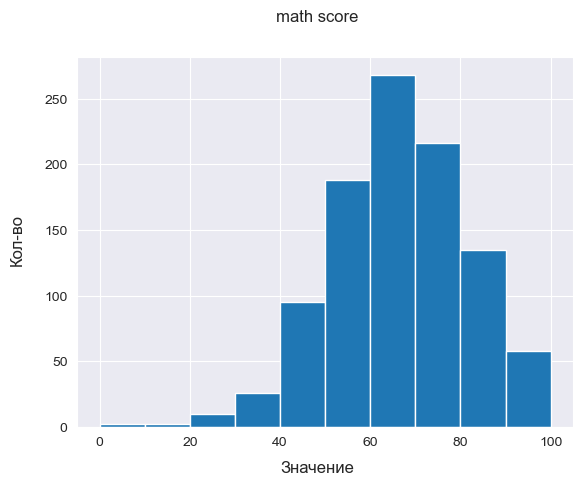

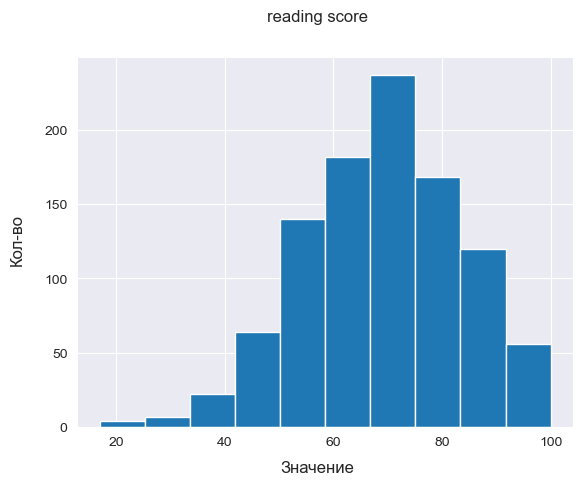

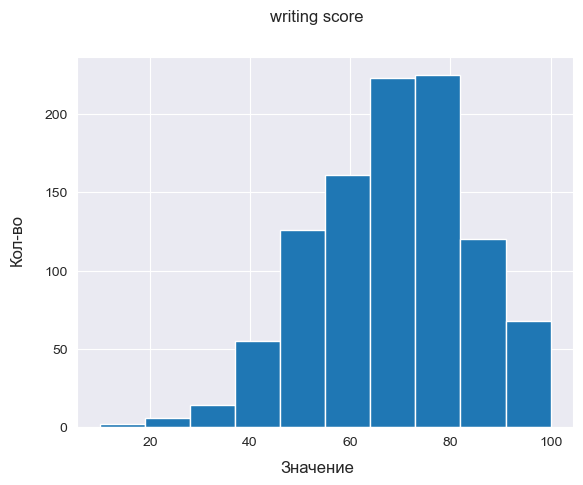

In [43]:
for x in attrs:
    fig = plt.figure()
    fig.suptitle(x.name)
    fig.supxlabel("Значение")
    fig.supylabel("Кол-во")
    x.hist()

## Найдем выбросы

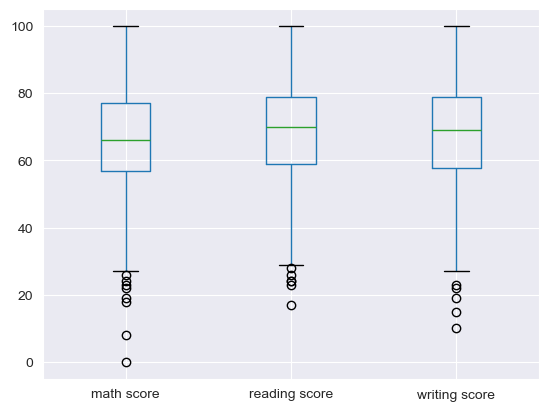

In [44]:
fig = file.boxplot()

Выбросы есть.

## Найдем корреляцию
Для начала построим матрицы рассеивания

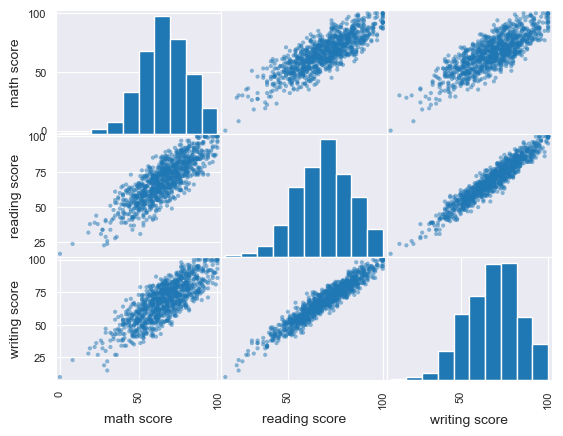

In [45]:
frame = pd.DataFrame(file.select_dtypes(include=['number']))
scatter_matrix = pd.plotting.scatter_matrix(frame)

Проверим какие параметры коррелируют с помощью матрицы корреляций

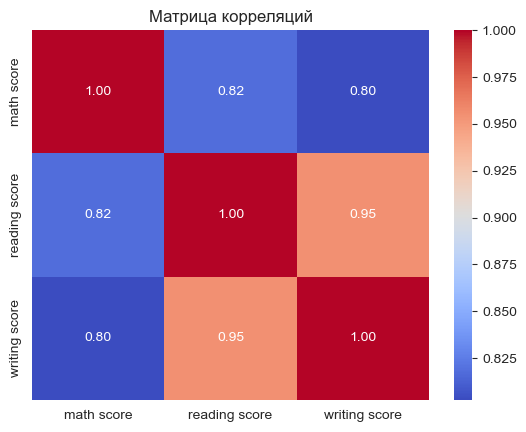

In [46]:
import seaborn as sns

correlation_matrix = frame.corr()
plt.figure()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True,
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.title('Матрица корреляций')
plt.show()

## Анализ корреляции
Можно заметить, что результаты по математике не сильно влияют на оценки по двум другим гуманитарным дисциплинам. А вот чтение и писание между собой очень сильно коррелируют, что логично.